This Jupyter Notebook separately analyzes the ***True Positive Rate (TPR)*** for **male** and **female** patients across multiple disease labels and models. It processes five CSV files, computes the optimal threshold using the F1 score, and evaluates TPR independently for each gender. The results are visualized in gender-specific bar plots, allowing for a clear comparison of model performance in disease detection for males and females.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [11]:
# List of diseases
diseases = [
    "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", 
    "Edema", "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", 
    "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices", "No Finding"
]

# Calculate TPR
def calculate_tpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn) if (tp + fn) > 0 else 0

# Find the best threshold based on F1 score
def find_best_threshold(y_true, y_prob):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        tp = ((y_pred == 1) & (y_true == 1)).sum()
        fp = ((y_pred == 1) & (y_true == 0)).sum()
        fn = ((y_pred == 0) & (y_true == 1)).sum()
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold

# Calculate TPR by gender for a specific disease
def calculate_tpr_by_gender(df, disease):
    y_true = df[f"{disease}_ground_truth"]
    y_prob = df[f"{disease}_probability"]
    best_threshold = find_best_threshold(y_true, y_prob)
    y_pred = (y_prob >= best_threshold).astype(int)
    
    tprs = {}
    for gender in df["gender"].dropna().unique():
        gender_subset = df[df["gender"] == gender]
        if gender_subset[f"{disease}_ground_truth"].nunique() < 2 or gender_subset[f"{disease}_probability"].nunique() < 2:
            tprs[gender] = None
        else:
            y_true_gender = gender_subset[f"{disease}_ground_truth"]
            y_pred_gender = (gender_subset[f"{disease}_probability"] >= best_threshold).astype(int)
            tprs[gender] = calculate_tpr(y_true_gender, y_pred_gender)
    return tprs

# Process a CSV file and calculate TPRs for all diseases by gender
def process_csv(file_path):
    df = pd.read_csv(file_path)
    tpr_results = {}
    for disease in diseases:
        tpr_results[disease] = calculate_tpr_by_gender(df, disease)
    return tpr_results

In [12]:
# Process all CSV files
csv_files = ["baseline.csv", "adversarial.csv", "finetuned.csv", "ensemble.csv", "committee.csv"]
tpr_data = {csv_file: process_csv(csv_file) for csv_file in csv_files}

/var/folders/c6/r8w_0v2s1d95dd_pl7s4t_3m0000gn/T/ipykernel_50891/2088806719.py:19: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df, x="Disease", y="TPR", hue="Model", palette=pastel_colors)


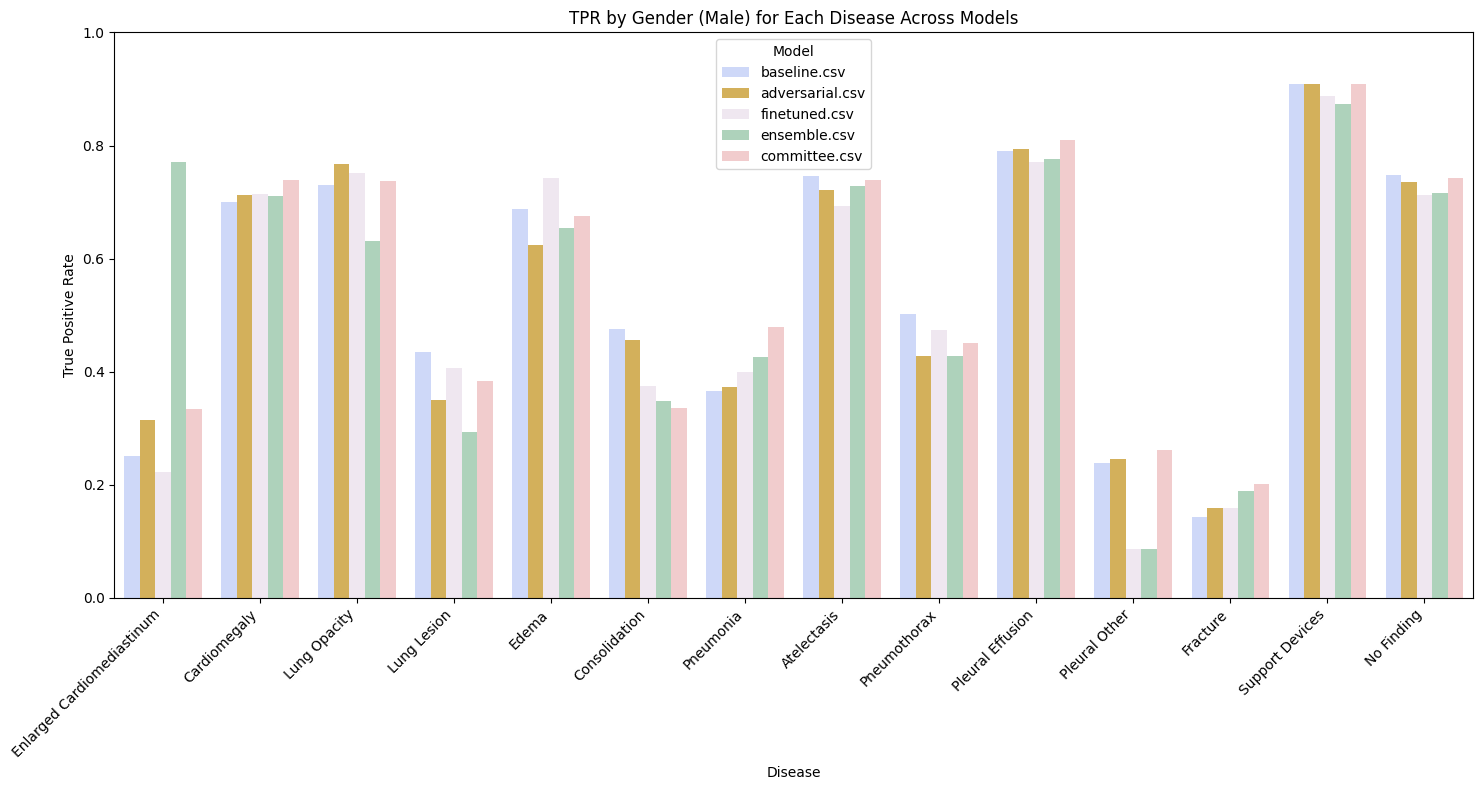

In [13]:
# Visualization
pastel_colors = ['#c7d5ff', '#e7b847', '#f0e6f1', '#a8d8b9', '#f7c6c7', '#ffd8be']

# Prepare data for plotting
plot_data = []
for disease in diseases:
    for csv_file in csv_files:
        tpr_male = tpr_data[csv_file][disease].get("M", None)
        if tpr_male is not None:
            plot_data.append({"Disease": disease, "Model": csv_file, "TPR": tpr_male})

plot_df = pd.DataFrame(plot_data)

# Determine the global max TPR value for consistent scaling
max_tpr = plot_df["TPR"].max()

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=plot_df, x="Disease", y="TPR", hue="Model", palette=pastel_colors)
plt.xticks(rotation=45, ha="right")
plt.title("TPR by Gender (Male) for Each Disease Across Models")
plt.ylabel("True Positive Rate")
plt.xlabel("Disease")
plt.legend(title="Model")
plt.ylim(0, max_tpr * 1.1)  
plt.tight_layout()
plt.show()


/var/folders/c6/r8w_0v2s1d95dd_pl7s4t_3m0000gn/T/ipykernel_50891/2002567644.py:16: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(data=plot_df_female, x="Disease", y="TPR", hue="Model", palette=pastel_colors)


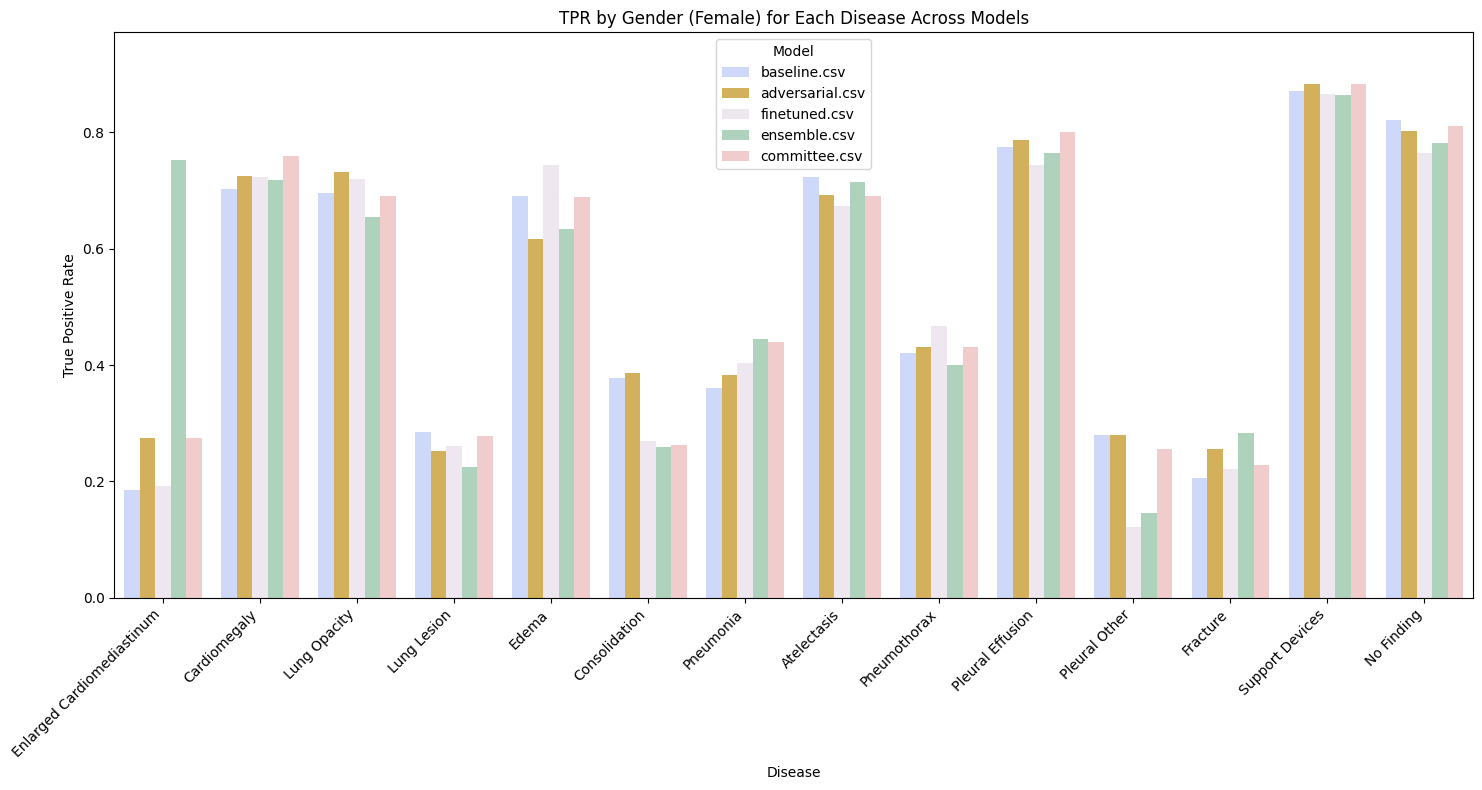

In [14]:
# Prepare data for plotting (Female)
plot_data_female = []
for disease in diseases:
    for csv_file in csv_files:
        tpr_female = tpr_data[csv_file][disease].get("F", None)
        if tpr_female is not None:
            plot_data_female.append({"Disease": disease, "Model": csv_file, "TPR": tpr_female})

plot_df_female = pd.DataFrame(plot_data_female)

# Determine the global max TPR value for consistent scaling
max_tpr_female = plot_df_female["TPR"].max()

# Plotting (Female)
plt.figure(figsize=(15, 8))
sns.barplot(data=plot_df_female, x="Disease", y="TPR", hue="Model", palette=pastel_colors)
plt.xticks(rotation=45, ha="right")
plt.title("TPR by Gender (Female) for Each Disease Across Models")
plt.ylabel("True Positive Rate")
plt.xlabel("Disease")
plt.legend(title="Model")
plt.ylim(0, max_tpr_female * 1.1)  
plt.tight_layout()
plt.show()

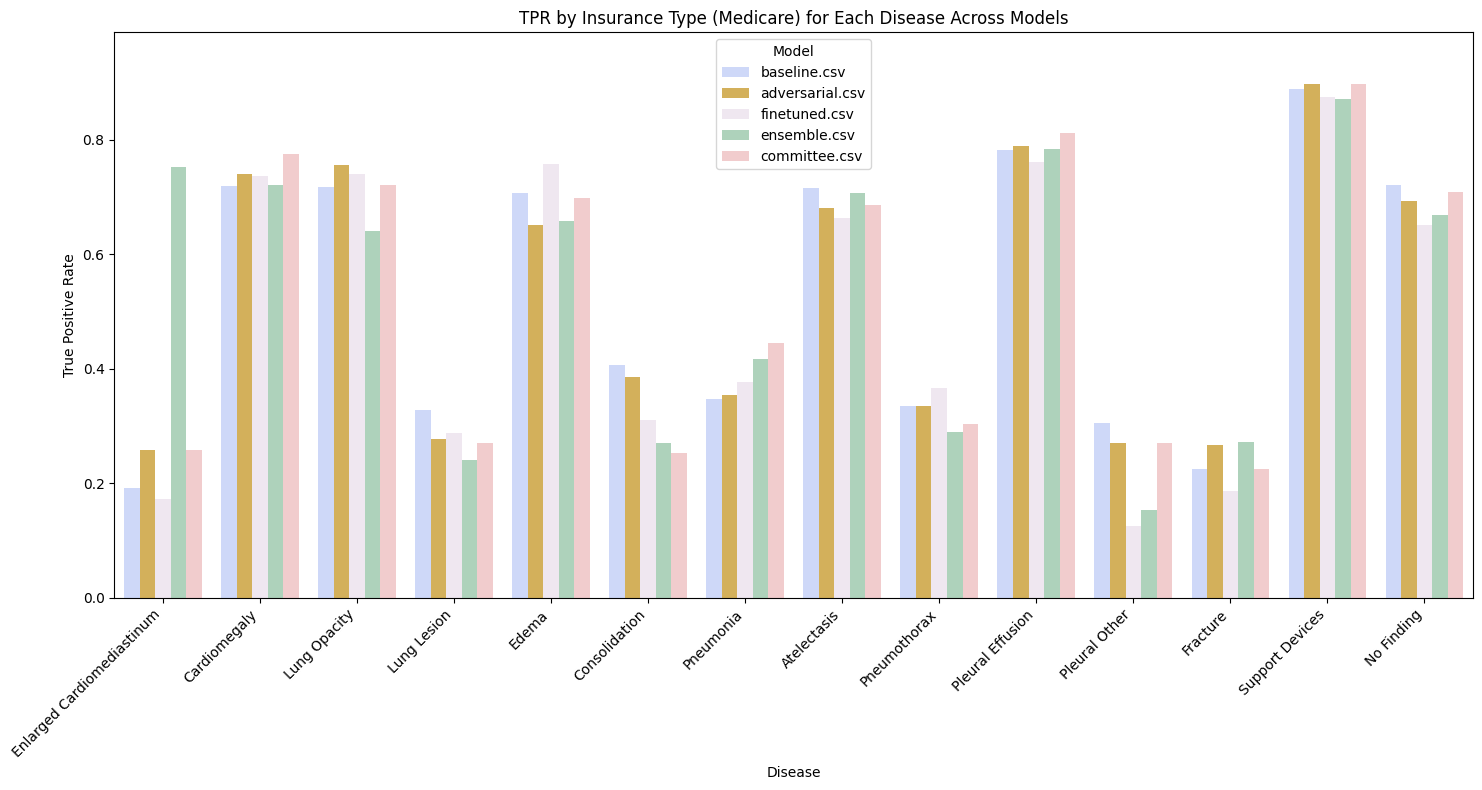

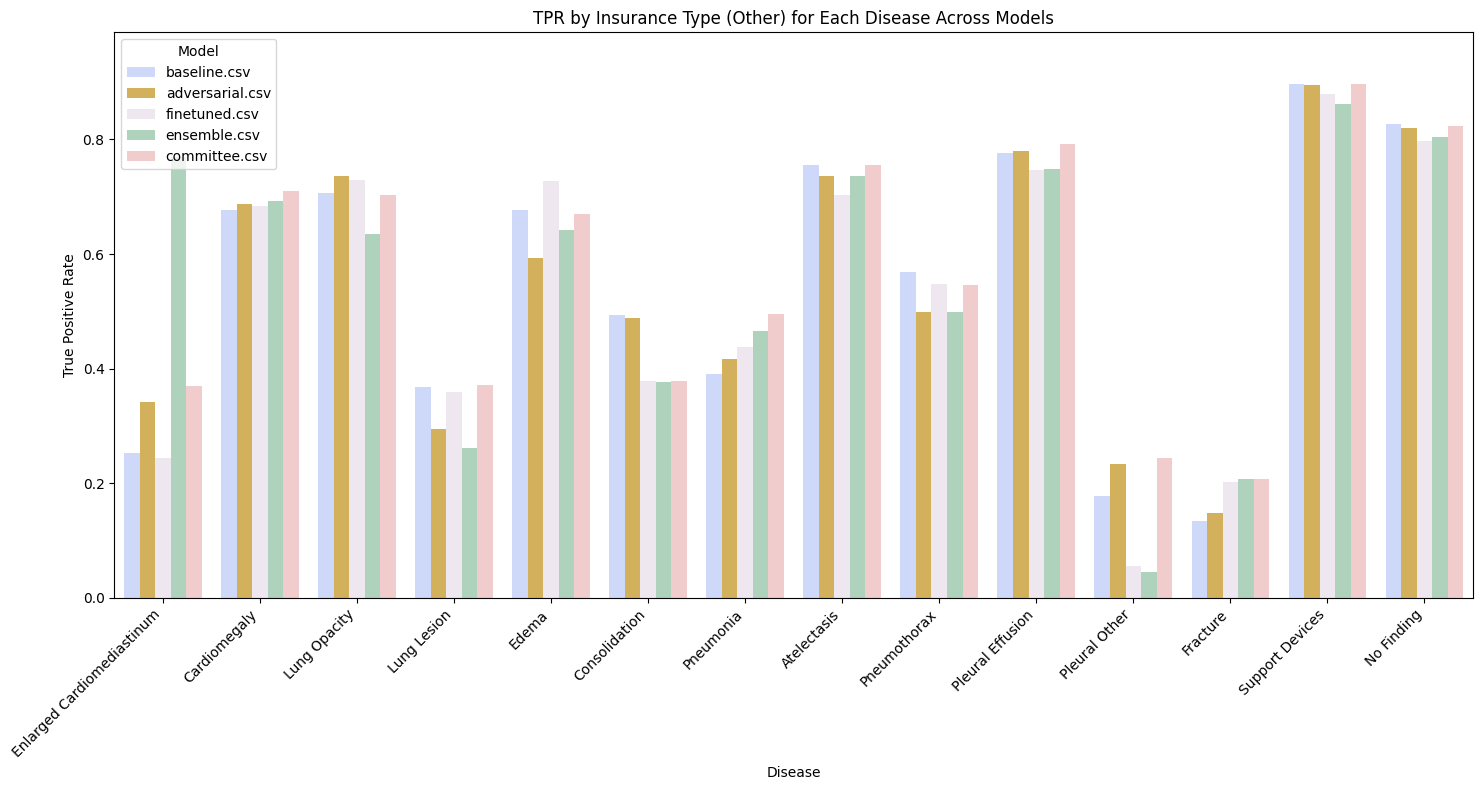

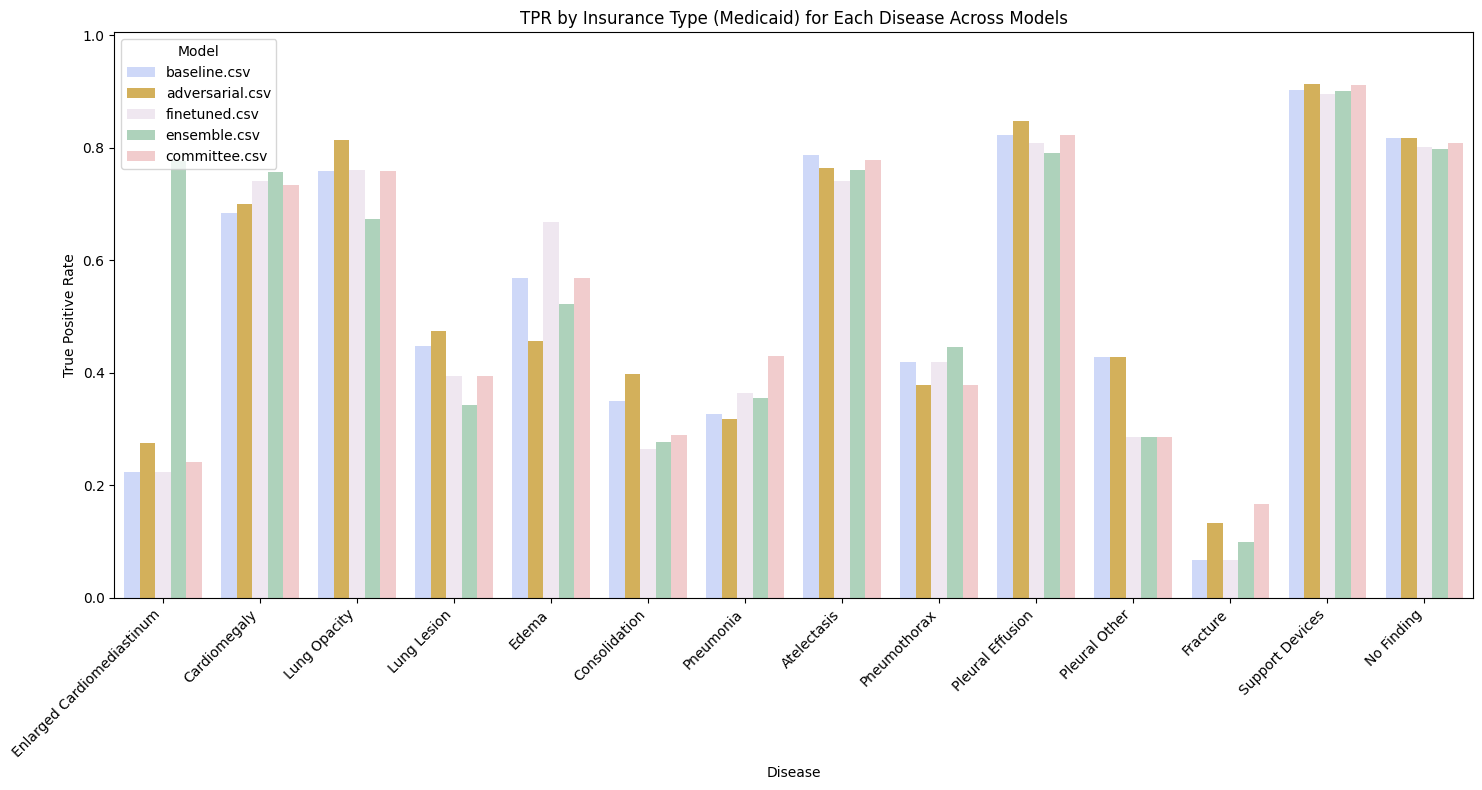

In [16]:
# List of insurance types
insurance_types = ["Medicare", "Other", "Medicaid"]

# Calculate TPR
def calculate_tpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tp / (tp + fn) if (tp + fn) > 0 else 0

# Find the best threshold based on F1 score
def find_best_threshold(y_true, y_prob):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)
        tp = ((y_pred == 1) & (y_true == 1)).sum()
        fp = ((y_pred == 1) & (y_true == 0)).sum()
        fn = ((y_pred == 0) & (y_true == 1)).sum()
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold

# Calculate TPR by insurance type for a specific disease
def calculate_tpr_by_insurance(df, disease):
    y_true = df[f"{disease}_ground_truth"]
    y_prob = df[f"{disease}_probability"]
    best_threshold = find_best_threshold(y_true, y_prob)
    y_pred = (y_prob >= best_threshold).astype(int)
    
    tprs = {}
    for insurance in df["insurance"].dropna().unique():
        insurance_subset = df[df["insurance"] == insurance]
        if insurance_subset[f"{disease}_ground_truth"].nunique() < 2 or insurance_subset[f"{disease}_probability"].nunique() < 2:
            tprs[insurance] = None
        else:
            y_true_insurance = insurance_subset[f"{disease}_ground_truth"]
            y_pred_insurance = (insurance_subset[f"{disease}_probability"] >= best_threshold).astype(int)
            tprs[insurance] = calculate_tpr(y_true_insurance, y_pred_insurance)
    return tprs

# Process a CSV file and calculate TPRs for all diseases by insurance type
def process_csv(file_path):
    df = pd.read_csv(file_path)
    tpr_results = {}
    for disease in diseases:
        tpr_results[disease] = calculate_tpr_by_insurance(df, disease)
    return tpr_results

# Process CSV files
tpr_data = {csv_file: process_csv(csv_file) for csv_file in csv_files}

# Plot TPR by insurance type for each disease across models
def plot_tpr_by_insurance(insurance_type):
    pastel_colors = ['#c7d5ff', '#e7b847', '#f0e6f1', '#a8d8b9', '#f7c6c7']
    plot_data = []
    for disease in diseases:
        for csv_file in csv_files:
            tpr_value = tpr_data[csv_file][disease].get(insurance_type, None)
            if tpr_value is not None:
                plot_data.append({"Disease": disease, "Model": csv_file, "TPR": tpr_value})
    plot_df = pd.DataFrame(plot_data)
    
    # Determine the global max TPR value for consistent scaling
    max_tpr = plot_df["TPR"].max()
    
    # Plotting
    plt.figure(figsize=(15, 8))
    sns.barplot(data=plot_df, x="Disease", y="TPR", hue="Model", palette=pastel_colors)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"TPR by Insurance Type ({insurance_type}) for Each Disease Across Models")
    plt.ylabel("True Positive Rate")
    plt.xlabel("Disease")
    plt.legend(title="Model")
    plt.ylim(0, max_tpr * 1.1)  
    plt.tight_layout()
    plt.show()

# Plots for each insurance type
for insurance in insurance_types:
    plot_tpr_by_insurance(insurance)
